# European Soccer Database Analysis

Use the "Run" button to execute the code.

In [ ]:
link to Database-https://www.kaggle.com/datasets/hugomathien/soccer 

In [9]:
 
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

path = "/home/jovyan/work/7afd927c39da42cd9e3cb979d1c33cf9_29/"  #Insert path here
database = path + 'database.sqlite'

In [10]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


#### List of the countries


In [11]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### List of Teams
Selecting 10 teams alphabetically using order by clause

In [12]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                       order by team_long_name
                       limit 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


#### List of Leagues and their countries
Using (Inner) Join which keeps only records that match the condition (after the ON) in both the tables, and records in both tables that do not match wouldn't appear in the output

In [13]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


#### Selecting Top 10 Tallest players

In [14]:
players = pd.read_sql("""SELECT *
                        FROM Player
                        order by height desc
                        limit 10;""", conn)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,5908,148325,Kristof van Hout,185306,1987-02-09 00:00:00,208.28,243
1,1301,150209,Bogdan Milic,189967,1987-11-24 00:00:00,203.20,216
2,1926,103428,Costel Pantilimon,192613,1987-02-01 00:00:00,203.20,212
3,3274,601304,Fejsal Mulic,226114,1994-10-03 00:00:00,203.20,185
4,5568,26585,Jurgen Wevers,148875,1979-01-12 00:00:00,203.20,212
5,5804,96465,Kevin Vink,193674,1984-07-30 00:00:00,203.20,194
6,5957,150297,Lacina Traore,199074,1990-05-20 00:00:00,203.20,192
7,8016,38567,Nikola Zigic,167515,1980-09-25 00:00:00,203.20,212
8,8285,41129,Paolo Acerbis,137130,1981-05-05 00:00:00,203.20,190
9,8638,39522,Pietro Marino,178389,1986-11-21 00:00:00,203.20,209


#### Top 5 players with highest overall rating

In [15]:
Top_5_players = pd.read_sql("""SELECT
                            distinct p.player_name,
                            pa.overall_rating
                        FROM
                            Player p
                        INNER JOIN
                            Player_Attributes pa
                        ON
                            p.player_api_id = pa.player_api_id
                        ORDER BY
                            pa.overall_rating DESC
                        LIMIT 5;""",conn)
Top_5_players             

,player_name,overall_rating
0,Lionel Messi,94
1,Cristiano Ronaldo,93
2,Gianluigi Buffon,93
3,Lionel Messi,93
4,Wayne Rooney,93


#### List of Matches
To retrieve detailed match information, specifically for matches that occurred in England.

In [16]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'England'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1730,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Arsenal,West Bromwich Albion,1,0
1,1731,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Sunderland,Liverpool,0,1
2,1732,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,West Ham United,Wigan Athletic,2,1
3,1734,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Everton,Blackburn Rovers,2,3
4,1735,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Middlesbrough,Tottenham Hotspur,2,1
5,1736,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Bolton Wanderers,Stoke City,3,1
6,1737,England,England Premier League,2008/2009,1,2008-08-16 00:00:00,Hull City,Fulham,2,1
7,1729,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1
8,1733,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Aston Villa,Manchester City,4,2
9,1738,England,England Premier League,2008/2009,1,2008-08-17 00:00:00,Chelsea,Portsmouth,4,0


#### List of Leagues by Season
 To get aggregated statistics about football leagues for multiple countries and seasons.

In [17]:
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scores, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Germany', 'France', 'Spain', 'England', 'Switzerland')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leagues_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


####  Average Goals Scored per Match for Each League

In [18]:
Avg_goals = pd.read_sql("""SELECT
                            l.name AS league_name,
                            COUNT(DISTINCT m.id) AS total_matches,
                            SUM(m.home_team_goal + m.away_team_goal) AS total_goals,
                            SUM(m.home_team_goal + m.away_team_goal) / COUNT(DISTINCT m.id) AS avg_goals_per_match
                        FROM
                            League l
                        LEFT JOIN
                            Match m
                        ON
                            l.id = m.league_id
                        GROUP BY
                            l.name
                        ORDER BY
                            avg_goals_per_match DESC;""",conn)
Avg_goals

,league_name,total_matches,total_goals,avg_goals_per_match
0,Netherlands Eredivisie,2448,7542,3
1,Belgium Jupiler League,1728,4841,2
2,England Premier League,3040,8240,2
3,France Ligue 1,3040,7427,2
4,Germany 1. Bundesliga,2448,7103,2
5,Italy Serie A,3017,7895,2
6,Poland Ekstraklasa,1920,4656,2
7,Portugal Liga ZON Sagres,2052,5201,2
8,Scotland Premier League,1824,4804,2
9,Spain LIGA BBVA,3040,8412,2


In [33]:
England_league = pd.read_sql("""SELECT
                            Match.id AS Match_ID,
                            Match.date AS Match_Date,
                            League.name AS League_Name,
                            Team.team_long_name AS Home_Team,
                            Team2.team_long_name AS Away_Team,
                            Match.home_team_goal AS Home_Team_Goals,
                            Match.away_team_goal AS Away_Team_Goals,
                            Team_Attributes.buildUpPlaySpeed AS Home_Team_Speed,
                            Team_Attributes.buildUpPlayPassing AS Home_Team_Passing,
                            Team2_Attributes.buildUpPlaySpeed AS Away_Team_Speed,
                            Team2_Attributes.buildUpPlayPassing AS Away_Team_Passing
                        FROM
                            Match
                        JOIN
                            League ON Match.league_id = League.id
                        JOIN
                            Team ON Match.home_team_api_id = Team.team_api_id
                        JOIN
                            Team AS Team2 ON Match.away_team_api_id = Team2.team_api_id
                        JOIN
                            Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id
                        JOIN
                            Team_Attributes AS Team2_Attributes ON Team2.team_api_id = Team2_Attributes.team_api_id
                        WHERE
                            League.name = 'England Premier League'
                        LIMIT 10; -- You can adjust the limit as needed""",conn)
England_league


,Match_ID,Match_Date,League_Name,Home_Team,Away_Team,Home_Team_Goals,Away_Team_Goals,Home_Team_Speed,Home_Team_Passing,Away_Team_Speed,Away_Team_Passing
0,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,54,47
1,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,54,54
2,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,55,50
3,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,58,49
4,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,58,72
5,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,38,44,70,60
6,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,46,38,54,47
7,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,46,38,54,54
8,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,46,38,55,50
9,1729,2008-08-17 00:00:00,England Premier League,Manchester United,Newcastle United,1,1,46,38,58,49


<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

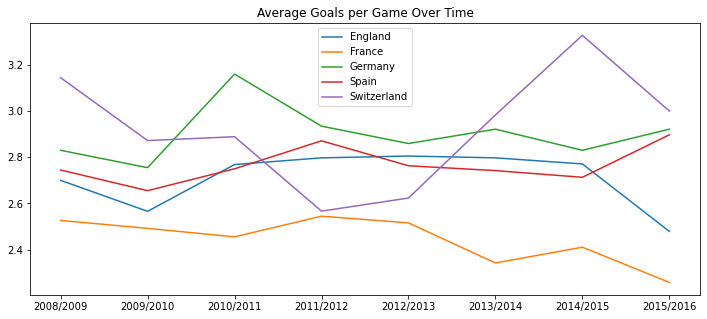

In [27]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'France']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'England']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])
df.loc[:,'Switzerland']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Switzerland','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

<AxesSubplot:title={'center':'Average Goals Difference Home vs Out'}>

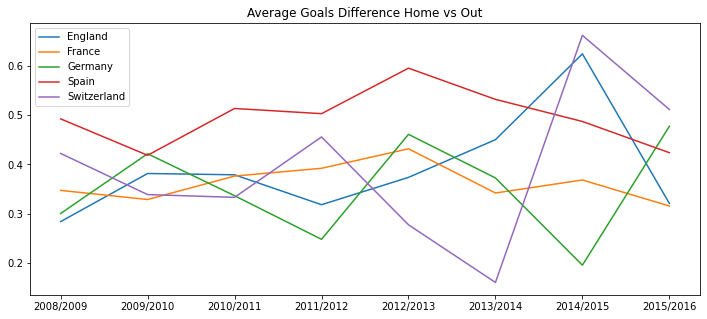

In [20]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'France']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'England']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goal_dif'])
df.loc[:,'Switzerland']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Switzerland','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

In [21]:
players_Weight = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(Weight)<160 then 160
                                        WHEN ROUND(Weight)>190 then 190
                                        ELSE ROUND(Weight)
                                        END AS calc_Weight, 
                                        COUNT(Weight) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(height) AS avg_height 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_Weight
                            ORDER BY calc_Weight
                                ;""", conn)
players_Weight


,calc_Weight,distribution,avg_overall_rating,avg_potential,avg_height
0,160.0,3250,66.200721,72.193535,176.054043
1,161.0,565,66.748697,72.247185,179.045274
2,163.0,577,66.580932,72.094490,180.163917
3,165.0,811,66.090878,71.527928,181.032158
4,168.0,600,66.692551,72.043486,182.046033
5,170.0,551,66.627925,71.894661,182.386751
6,172.0,656,66.963726,71.975594,183.363994
7,174.0,488,66.937069,71.540667,183.874139
8,176.0,697,67.192801,72.126052,184.982697
9,179.0,375,67.152720,71.561417,185.000053


<AxesSubplot:title={'center':'Potential vs Weight'}, xlabel='calc_Weight'>

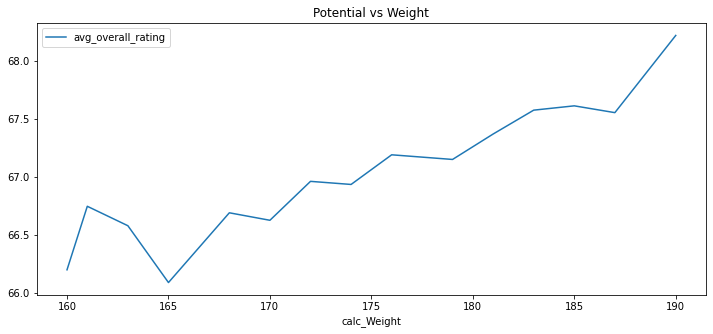

In [22]:
players_Weight.plot(x='calc_Weight', y='avg_overall_rating', figsize=(12, 5), title='Potential vs Weight')
